In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import collections

In [71]:
with open('startup_funding.csv',encoding='utf8') as file_obj:
    file_data = csv.DictReader(file_obj,skipinitialspace =True,delimiter= ',')

Problem Statement :<br>
Check the trend of investments over the years. To check the trend, find -<br>
Total number of fundings done in each year.<br>
Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.<br>
Print year-wise total number of fundings also. Print years in ascending order.<br>
Note :<br>
There is some error in the 'Date' feature. Make sure to handle that.<br>
Output Format :<br>
year1 TotalFunding1<br>
year2 TotalFunding2<br>
. . . 

OrderedDict([('2015', 936), ('2016', 993), ('2017', 443)])


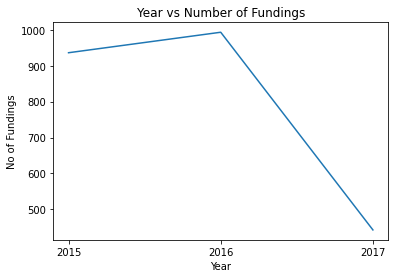

2017 443
2016 993
2015 936


In [70]:
with open('startup_funding.csv',encoding='utf8') as file_obj:
    file_data = csv.DictReader(file_obj,skipinitialspace =True,delimiter= ',')

    dic = {}
    # In the Date column there are many values in the 'dd-mm-yyyy' format but some of their are in another format so if just split on the basis of 
    # - and take the [2] column it will gives us error
    # In order to take the year column only we will take the value in a string and slice the last 4 characetrs
    for row in file_data:
        year = row['Date'][-4:]
        # print(year)

        if year in dic:
            dic[year] += 1
        else:
            dic[year] = 1
    
    ord_dict = collections.OrderedDict(sorted(dic.items()))
    print(ord_dict)
    plt.plot(list(ord_dict.keys()),list(ord_dict.values()))
    plt.xlabel('Year')
    plt.ylabel('No of Fundings')
    plt.title('Year vs Number of Fundings')
    plt.show()


    for key,value in dic.items():
        print(key,value)


Problem Statement :<br>
Find out which cities are generally chosen for starting a startup.<br>
Find top 10 Indian cities which have most number of startups ?<br>
Plot a pie chart and visualise it.<br>
Print the city name and number of startups in that city also.<br>
Note :<br>
Take city name "Delhi" as "New Delhi".<br>
Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as <br>"Bangalore".<br>
For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is <br>first.<br>
Print the city in descending order with respect to the number of startups.<br>
Output Format :<br>
city1 number1<br>
city2 number2<br>
. . . <br>

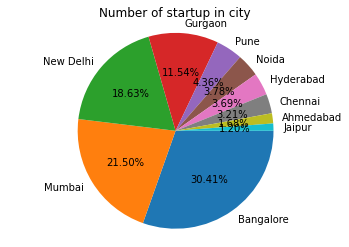

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [23]:
df = pd.read_csv('startup_funding.csv',encoding='utf8')
# remove NAN values in the cityLocation Dataset

df.dropna(subset=['CityLocation'],inplace = True)

def mainCity(city):
    return city.split('/')[0].strip()
# apply method in pandas is used to apply a function
df['CityLocation'] = df['CityLocation'].apply(mainCity)
df[df['CityLocation'] == 'bangalore'] = 'Bangalore'
df[df['CityLocation'] == 'Delhi'] = 'New Delhi'

city = df['CityLocation']
city = city.value_counts()[:10]
city_name = city.index
no_of_str = city.values

plt.pie(no_of_str, labels=city_name, autopct='%.2f%%',counterclock=False)
plt.title('Number of startup in city')
plt.axis("equal")
plt.show()

for i in range(city_name.shape[0]):
    print(city_name[i],no_of_str[i])

Problem Statement :<br>
Find out if cities play any role in receiving funding.<br>
Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).<br>
Print the city and percentage with 2 decimal place after rounding off.<br>
Note:<br>
Take city name "Delhi" as "New Delhi".<br>
Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as <br>"Bangalore".
For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is <br>first.
Print the city in descending order with respect to the percentage of funding.<br>

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21

In [5]:
df = pd.read_csv('startup_funding.csv',encoding='utf8')


,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01-08-2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"13,00,000",NaN
1,1,02-08-2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02-08-2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02-08-2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"5,00,000",NaN
4,4,02-08-2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"8,50,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29-01-2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
2368,2368,29-01-2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
2369,2369,30-01-2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
2370,2370,30-01-2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


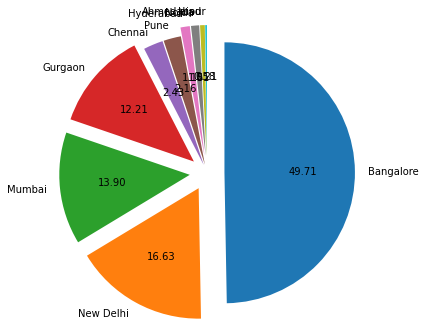

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


In [22]:
df = pd.read_csv('startup_funding.csv',encoding='utf8')

# City
# Step 1 (Remove the NaN values)
df.dropna(subset= ['CityLocation'],inplace=True)

# Step 2 replace the foreign country names
def separateCity(city):
    return city.split('/')[0].strip()
# replace delhi by New Delhi and banalore by Bangalore
df['CityLocation'] = df['CityLocation'].apply(separateCity)
df['CityLocation'].replace('bangalore','Bangalore',inplace = True)
df['CityLocation'].replace('Delhi','New Delhi',inplace = True)

# step 3 replace all the values
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))
# group by function and sum of amounts
df = df.groupby('CityLocation')['AmountInUSD'].sum()
df = df.sort_values(ascending=False)[:10]

city = df.index
amount = df.values

explode = [0.2,0.2,0.2,0.2,0.1,0.1,0.2,0.2,0.2,0.2]
plt.pie(amount,labels = city,autopct='%0.2f',counterclock=False,startangle=90,explode =explode,radius=1.5)
plt.show()

percent = np.true_divide(amount,amount.sum())*100
for i in range(len(city)):
    print(city[i],format(percent[i],'0.2f'))

Problem Statement :<br>
There are 4 different type of investments. Find out percentage of amount funded for each investment type.<br>
Plot a pie chart to visualise.<br>
Print the investment type and percentage of amount funded with 2 decimal places after rounding off.<br>
Note :<br>
Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling <br>mistake. You can find this by printing unique values from this column.<br>
Print the investment type in descending order with respect to the percentage of the amount funded.<br>
Output Format :<br>
investmentType1 percent1<br>
investmentType2 percent2<br>
investmentType3 percent3<br>
. . . 

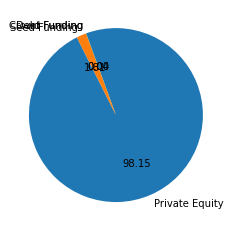

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


In [36]:
df = pd.read_csv('startup_funding.csv',encoding='utf8')

df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace = True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace = True)
df['InvestmentType'].replace('DebtFunding','Debt Funding',inplace = True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace = True)

df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x : float(str(x).replace(",","")))

df = df.groupby('InvestmentType')['AmountInUSD'].sum()
df = df.sort_values(ascending=False)[:10]
invest = df.index
amount = df.values

plt.pie(amount,labels = invest,autopct='%0.2f',counterclock=False,startangle=110)
plt.show()

percent = np.true_divide(amount,amount.sum())*100
for i in range(len(invest)):
    print(invest[i],format(percent[i],'0.2f'))

Problem Statement :<br>
Which type of companies got more easily funding. To answer this question, find -<br>
Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)<br>
Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.<br>
Note :<br>
Ecommerce is the right word in IndustryVertical, so correct it.<br>
Print the industry in descending order with respect to the percentage of the amount funded.<br>
Output Format :<br>
industry1 percent1<br>
industry2 percent2<br>
industry3 percent3

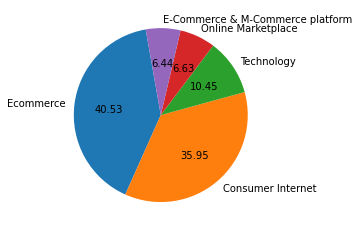

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [44]:
df = pd.read_csv('startup_funding.csv',encoding='utf8')

df['IndustryVertical'].replace('ECommerce','Ecommerce',inplace = True)
df['IndustryVertical'].replace('eCommerce','Ecommerce',inplace = True)
df['IndustryVertical'].replace('ecommerce','Ecommerce',inplace = True)
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x : float(str(x).replace(",","")))


df = df.groupby('IndustryVertical')['AmountInUSD'].sum()
df = df.sort_values(ascending=False)[:5]

industry = df.index
amount = df.values

plt.pie(amount,labels = industry,autopct='%0.2f',startangle=100)
plt.show()


percent = np.true_divide(amount,amount.sum())*100
for i in range(len(industry)):
    print(industry[i],format(percent[i],'0.2f'))

Problem Statement :<br>
Find top 5 startups with most amount of total funding.<br>
Print the startup name in descending order with respect to amount of funding.<br>
Note:<br>
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.
Output Format :<br>
startup1<br>
startup2<br>
startup3<br>
. . . <br>

In [46]:
df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')

df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)

df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))
df = df.groupby('StartupName')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[:5]
startup = df.index


for i in range(5):
    print(startup[i])

Paytm
Flipkart
Ola
Snapdeal
Oyo


In [48]:
df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')

df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)

totalfunding = df['StartupName'].value_counts()[:5]
startupname = totalfunding.index
count = totalfunding.values

for i in range(5):
    print(startupname[i],count[i])

Ola 9
Swiggy 7
UrbanClap 6
Paytm 6
Oyo 6


Problem Statement :<br>
Find the Investors who have invested maximum number of times.<br>
Print the investor name and number of times invested as integer value.<br>
Note:<br>
In startup, multiple investors might have invested. So consider each investor for that startup.<br>
Ignore the undisclosed investors.<br>
Output Format :<br>
investorname number

In [66]:
df = pd.read_csv('startup_funding.csv',encoding='utf8')
df = df.dropna(subset=['InvestorsName'])
dic = {}
def each(n):
    n = n.split(',')
    l = []


    for i in n:
        l.append(i.strip())

    for i in l:
        if i in dic:
            dic[i] += 1
        else:
            dic[i] =  1

            

df['InvestorsName'] = df['InvestorsName'].apply(each)

r= Counter(dic) #counter will create a hashmap (1 appear 4 times so 1:4)
high = r.most_common(5) #sort the values in asceding order
for i in high: 
    print(i[0],i[1]," ") 
    break

Sequoia Capital 64  
